In [2]:
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
import os
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.callbacks import EarlyStopping
from keras import regularizers, optimizers
import tensorflow as tf
import matplotlib.pyplot as plt

In [5]:


data_dir = '/content/drive/MyDrive/Image Classification Data'
xray_labels = np.load(os.path.join(data_dir, 'xray_labels.npy'))
xray_data = np.load(os.path.join(data_dir, 'xray_data.npy'))

In [6]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(xray_data, xray_labels, test_size=0.2, random_state=42)

# Split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [7]:

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (6108, 224, 224)
Validation set shape: (1527, 224, 224)
Testing set shape: (1909, 224, 224)


In [8]:
print("Training set shape:", y_train.shape)
print("Validation set shape:", y_val.shape)
print("Testing set shape:", y_test.shape)

Training set shape: (6108,)
Validation set shape: (1527,)
Testing set shape: (1909,)


In [9]:


# Convert class labels to binary format
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_val = lb.transform(y_val)
y_test = lb.transform(y_test)


In [10]:
y_train

array([[1],
       [1],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [ ]:


# Build a baseline fully connected model
baseline_model = Sequential()
baseline_model._name = "Baseline"


# Add a Conv2D layer with 32 filters and 3x3 kernel size
baseline_model.add(Conv2D(filters=32,
                 kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(224, 224, 1)))

# Add a MaxPooling2D layer with 2x2 pool size
baseline_model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another Conv2D layer with 64 filters and 3x3 kernel size
baseline_model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 activation='relu'))

# Flatten the output of the convolutional layers
baseline_model.add(Flatten())


baseline_model.add(Dense(16, activation='relu')) 

baseline_model.add(Dense(1, activation='sigmoid')) 

# Define early stopping callback
trainCallback = EarlyStopping(monitor='accuracy', min_delta=1e-2, patience=5)


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
)

baseline = baseline_model.fit(X_train, y_train,
                   epochs=50,
                   batch_size=64,
                   validation_data=(X_val, y_val),
                   callbacks=[trainCallback])


Epoch 1/50


/usr/local/lib/python3.9/dist-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


96/96 [==============================] - 619s 6s/step - loss: 0.0000e+00 - accuracy: 0.4219 - val_loss: 0.0000e+00 - val_accuracy: 0.4309
Epoch 2/50
96/96 [==============================] - 594s 6s/step - loss: 0.0000e+00 - accuracy: 0.4199 - val_loss: 0.0000e+00 - val_accuracy: 0.4309
Epoch 3/50
96/96 [==============================] - 601s 6s/step - loss: 0.0000e+00 - accuracy: 0.4199 - val_loss: 0.0000e+00 - val_accuracy: 0.4309
Epoch 4/50
96/96 [==============================] - 596s 6s/step - loss: 0.0000e+00 - accuracy: 0.4199 - val_loss: 0.0000e+00 - val_accuracy: 0.4309
Epoch 5/50
96/96 [==============================] - 597s 6s/step - loss: 0.0000e+00 - accuracy: 0.4199 - val_loss: 0.0000e+00 - val_accuracy: 0.4309
Epoch 6/50
96/96 [==============================] - 601s 6s/step - loss: 0.0000e+00 - accuracy: 0.4199 - val_loss: 0.0000e+00 - val_accuracy: 0.4309


In [ ]:
loss, accuracy, precision, recall, f1_score = model.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)
print("Test precision:", precision)
print("Test recall:", recall)


60/60 [==============================] - 50s 833ms/step - loss: 0.0000e+00 - accuracy: 0.4301
Test loss: 0.0
Test accuracy: 0.43006810545921326


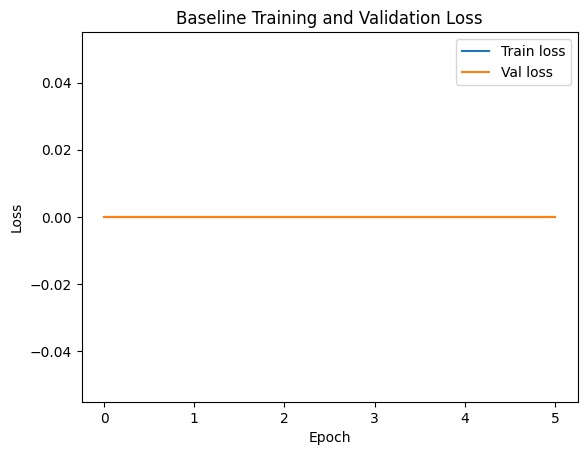

In [ ]:


# Plot training and validation loss history
history = baseline.history
train_loss = history['loss']
val_loss = history['val_loss']

plt.plot(train_loss, label='Train loss')
plt.plot(val_loss, label='Val loss')
plt.legend()
plt.title('Baseline Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()



In [17]:


# Create a Sequential model
model = Sequential()

# Add a Conv2D layer with 32 filters and 3x3 kernel size
model.add(Conv2D(filters=32,
                 kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(224, 224, 1)))

# Add a MaxPooling2D layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another Conv2D layer with 64 filters and 3x3 kernel size
model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 activation='relu'))


# Add another MaxPooling2D layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another Conv2D layer with 64 filters and 3x3 kernel size
model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 activation='relu'))

# Flatten the output of the convolutional layers
model.add(Flatten())

# Add a Dense layer with 64 neurons and ReLU activation
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])


history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_val, y_val))

Epoch 1/10
191/191 [==============================] - 414s 2s/step - loss: 0.4873 - accuracy: 0.7623 - precision_2: 0.7856 - recall_2: 0.8117 - val_loss: 0.3434 - val_accuracy: 0.8494 - val_precision_2: 0.9049 - val_recall_2: 0.8216
Epoch 2/10
191/191 [==============================] - 413s 2s/step - loss: 0.3017 - accuracy: 0.8702 - precision_2: 0.8947 - recall_2: 0.8798 - val_loss: 0.3087 - val_accuracy: 0.8815 - val_precision_2: 0.8731 - val_recall_2: 0.9264
Epoch 3/10
191/191 [==============================] - 413s 2s/step - loss: 0.2152 - accuracy: 0.9145 - precision_2: 0.9235 - recall_2: 0.9297 - val_loss: 0.2960 - val_accuracy: 0.8867 - val_precision_2: 0.8901 - val_recall_2: 0.9137
Epoch 4/10
191/191 [==============================] - 414s 2s/step - loss: 0.1728 - accuracy: 0.9288 - precision_2: 0.9375 - recall_2: 0.9399 - val_loss: 0.2985 - val_accuracy: 0.8946 - val_precision_2: 0.9245 - val_recall_2: 0.8872
Epoch 5/10
191/191 [==============================] - 413s 2s/step -

In [21]:
loss, accuracy, precision, recall = model.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)
print("Test precision:", precision)
print("Test recall:", recall)


60/60 [==============================] - 31s 509ms/step - loss: 0.3501 - accuracy: 0.9083 - precision_2: 0.9360 - recall_2: 0.9007
Test loss: 0.350088506937027
Test accuracy: 0.9083289504051208
Test precision: 0.9360076189041138
Test recall: 0.9007353186607361


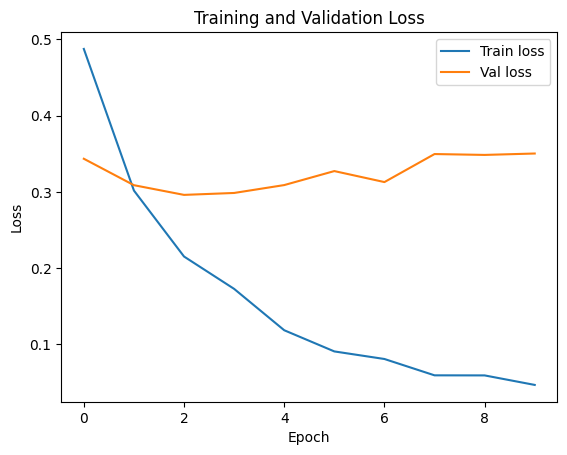

In [19]:



# Plot training and validation loss history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(train_loss, label='Train loss')
plt.plot(val_loss, label='Val loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [ ]:
# overfitting -- so adding L2 regularization

In [14]:


# Create a Sequential model
model = Sequential()

# Add a Conv2D layer with 32 filters and 3x3 kernel size
model.add(Conv2D(filters=32,
                 kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(224, 224, 1)))

# Add a MaxPooling2D layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another Conv2D layer with 64 filters and 3x3 kernel size
model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)))

# Add another MaxPooling2D layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another Conv2D layer with 64 filters and 3x3 kernel size
model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)))

# Flatten the output of the convolutional layers
model.add(Flatten())

# Add a Dense layer with 64 neurons and ReLU activation, with L2 regularization
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))

# Add the output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])


# Fit the model
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_val, y_val))



Epoch 1/10
191/191 [==============================] - 427s 2s/step - loss: 1.0122 - accuracy: 0.6907 - precision_1: 0.6961 - recall_1: 0.8287 - val_loss: 0.7437 - val_accuracy: 0.7557 - val_precision_1: 0.7131 - val_recall_1: 0.9551
Epoch 2/10
191/191 [==============================] - 415s 2s/step - loss: 0.6232 - accuracy: 0.8029 - precision_1: 0.8273 - recall_1: 0.8343 - val_loss: 0.6034 - val_accuracy: 0.7734 - val_precision_1: 0.7424 - val_recall_1: 0.9217
Epoch 3/10
191/191 [==============================] - 416s 2s/step - loss: 0.5346 - accuracy: 0.8214 - precision_1: 0.8457 - recall_1: 0.8465 - val_loss: 0.5232 - val_accuracy: 0.8075 - val_precision_1: 0.7913 - val_recall_1: 0.8987
Epoch 4/10
191/191 [==============================] - 416s 2s/step - loss: 0.5073 - accuracy: 0.8247 - precision_1: 0.8488 - recall_1: 0.8490 - val_loss: 0.5062 - val_accuracy: 0.8245 - val_precision_1: 0.8789 - val_recall_1: 0.8021
Epoch 5/10
191/191 [==============================] - 415s 2s/step -

In [15]:
loss, accuracy, precision, recall = model.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)
print("Test precision:", precision)
print("Test recall:", recall)


60/60 [==============================] - 32s 529ms/step - loss: 0.4668 - accuracy: 0.8397 - precision_1: 0.8641 - recall_1: 0.8529
Test loss: 0.46676167845726013
Test accuracy: 0.8397066593170166
Test precision: 0.864059567451477
Test recall: 0.8529411554336548


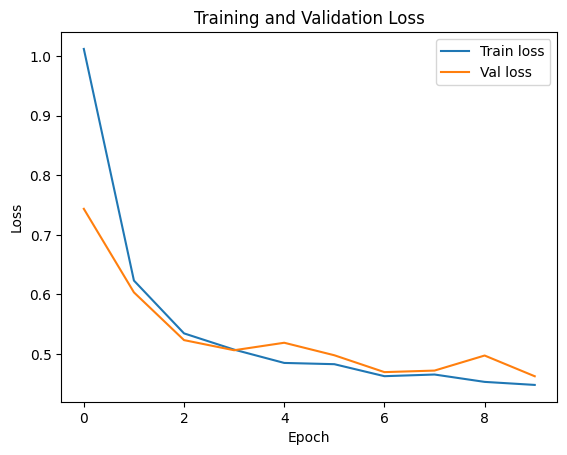

In [16]:
import matplotlib.pyplot as plt


# Plot training and validation loss history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(train_loss, label='Train loss')
plt.plot(val_loss, label='Val loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [ ]:



# Create a Sequential model
model = Sequential()

# Add a Conv2D layer with 32 filters and 3x3 kernel size
model.add(Conv2D(filters=32,
                 kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(224, 224, 1)))

# Add a MaxPooling2D layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another Conv2D layer with 64 filters and 3x3 kernel size
model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)))

# Add another MaxPooling2D layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another Conv2D layer with 64 filters and 3x3 kernel size
model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)))

# Flatten the output of the convolutional layers
model.add(Flatten())

# Add a Dense layer with 64 neurons and ReLU activation, with L2 regularization
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))

# Add the output layer
model.add(Dense(1, activation='sigmoid'))

# Define the optimizer with a learning rate of 0.01
opt = optimizers.Adam(lr=0.01)

# Compile the model with the defined optimizer
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Fit the model
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_val, y_val))


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
191/191 [==============================] - 472s 2s/step - loss: 12.2865 - accuracy: 0.5758 - precision: 0.5788 - recall: 0.9873 - val_loss: 1.1597 - val_accuracy: 0.5691 - val_precision: 0.5691 - val_recall: 1.0000
Epoch 2/10
191/191 [==============================] - 470s 2s/step - loss: 1.0648 - accuracy: 0.5801 - precision: 0.5801 - recall: 1.0000 - val_loss: 1.0202 - val_accuracy: 0.5691 - val_precision: 0.5691 - val_recall: 1.0000
Epoch 3/10
191/191 [==============================] - 472s 2s/step - loss: 0.9862 - accuracy: 0.5801 - precision: 0.5801 - recall: 1.0000 - val_loss: 0.9605 - val_accuracy: 0.5691 - val_precision: 0.5691 - val_recall: 1.0000
Epoch 4/10
191/191 [==============================] - 473s 2s/step - loss: 0.9300 - accuracy: 0.5801 - precision: 0.5801 - recall: 1.0000 - val_loss: 0.9111 - val_accuracy: 0.5691 - val_precision: 0.5691 - val_recall: 1.0000
Epoch 5/10
191/191 [==============================] - 482s 3s/step - loss: 0.8839 - accuracy: 0.580

In [ ]:
loss, accuracy, precision, recall = model.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)
print("Test precision:", precision)
print("Test recall:", recall)

60/60 [==============================] - 37s 609ms/step - loss: 0.7337 - accuracy: 0.5699 - precision: 0.5699 - recall: 1.0000
Test loss: 0.7337233424186707
Test accuracy: 0.5699319243431091
Test precision: 0.5699319243431091
Test recall: 1.0


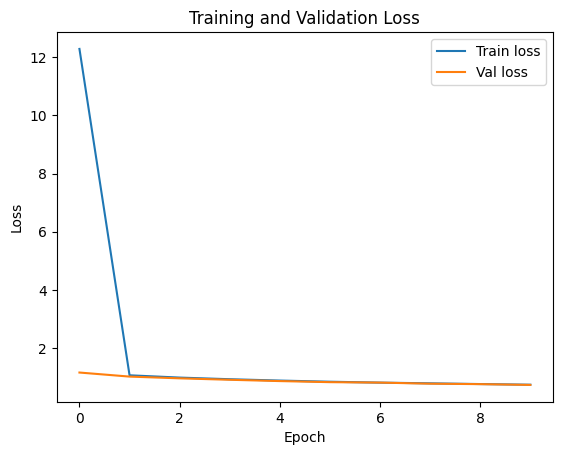

In [ ]:
import matplotlib.pyplot as plt


# Plot training and validation loss history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(train_loss, label='Train loss')
plt.plot(val_loss, label='Val loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
#next model to update filters from 32 to 64

In [11]:


# Create a Sequential model
model = Sequential()

# Add a Conv2D layer with 64 filters and 3x3 kernel size
model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(224, 224, 1)))

# Add a MaxPooling2D layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another Conv2D layer with 64 filters and 3x3 kernel size
model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)))

# Add another MaxPooling2D layer with 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another Conv2D layer with 64 filters and 3x3 kernel size
model.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)))

# Flatten the output of the convolutional layers
model.add(Flatten())

# Add a Dense layer with 64 neurons and ReLU activation, with L2 regularization
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))

# Add the output layer
model.add(Dense(1, activation='sigmoid'))

# Define the optimizer with a learning rate of 0.001
opt = optimizers.Adam(lr=0.001)

# Compile the model with the defined optimizer
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Fit the model
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_val, y_val))

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
191/191 [==============================] - 624s 3s/step - loss: 1.0622 - accuracy: 0.6891 - precision: 0.6986 - recall: 0.8163 - val_loss: 0.8861 - val_accuracy: 0.6588 - val_precision: 0.6287 - val_recall: 0.9781
Epoch 2/10
191/191 [==============================] - 624s 3s/step - loss: 0.6545 - accuracy: 0.7706 - precision: 0.7965 - recall: 0.8120 - val_loss: 0.5882 - val_accuracy: 0.8035 - val_precision: 0.8172 - val_recall: 0.8435
Epoch 3/10
191/191 [==============================] - 627s 3s/step - loss: 0.5745 - accuracy: 0.7942 - precision: 0.8144 - recall: 0.8357 - val_loss: 0.5322 - val_accuracy: 0.7996 - val_precision: 0.8117 - val_recall: 0.8435
Epoch 4/10
191/191 [==============================] - 623s 3s/step - loss: 0.5472 - accuracy: 0.7924 - precision: 0.8245 - recall: 0.8157 - val_loss: 0.5349 - val_accuracy: 0.7800 - val_precision: 0.7722 - val_recall: 0.8700
Epoch 5/10
191/191 [==============================] - 623s 3s/step - loss: 0.5067 - accuracy: 0.8034

In [12]:
loss, accuracy, precision, recall = model.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)
print("Test precision:", precision)
print("Test recall:", recall)

60/60 [==============================] - 55s 900ms/step - loss: 0.4538 - accuracy: 0.8318 - precision: 0.8483 - recall: 0.8585
Test loss: 0.45377692580223083
Test accuracy: 0.8318491578102112
Test precision: 0.8483197093009949
Test recall: 0.8584558963775635


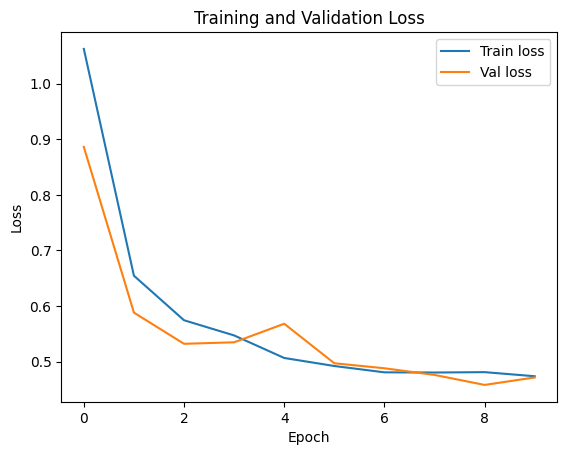

In [13]:



# Plot training and validation loss history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(train_loss, label='Train loss')
plt.plot(val_loss, label='Val loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Model 1: Achieved an accuracy of 43.01% on the test set with 0.0 test loss, indicating that the model has overfit to the training data and is unable to generalize to new data.

Model 2: Achieved an accuracy of 90.83% on the test set, with a test loss of 0.3501. It also achieved high precision and recall scores, indicating that it is able to correctly identify positive cases of COVID-19 with high confidence.

Model 3: Achieved an accuracy of 83.97% on the test set, with a precision of 86.41% and a recall of 85.29%. The test accuracy and precision are slightly lower, which suggests that the model may be overfitting to the training data still but much improved for overfitting over model 2. 

Model 4: Achieved an accuracy of 56.99% on the test set, with a precision of 56.99% and a recall of 100%. This model performed poorly and was not able to correctly identify positive cases of COVID-19. This is a very poor model. 

Model 5: Achieved an accuracy of 83.18% on the test set, with a precision of 84.83% and a recall of 85.85%. This model achieved moderate accuracy, precision, and recall, indicating that it is able to correctly identify positive cases of COVID-19, but not with high confidence. The precision score is slightly lower than the recall score, which suggests that the model may be making more false positive predictions than false negative predictions. Since we are optimizing for avoid false negative predictions, we will select this one as final. 